In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ratings = pd.read_csv("ratings.csv")
ratings.shape

(100836, 4)

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
ratings.columns = ["user_id", "movie_id", "rating", "timestamp"]
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
ratings["rating"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [6]:
ratings["rating"].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [7]:
print("mean   ", ratings.rating.mean())
print("median ", ratings.rating.median())

mean    3.501556983616962
median  3.5


In [8]:
ratings.rating.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: rating, dtype: float64

<AxesSubplot:ylabel='Frequency'>

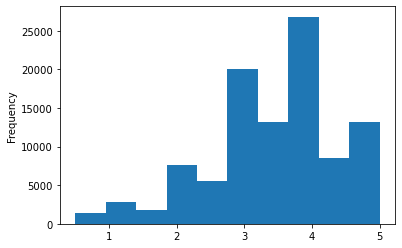

In [9]:
ratings.rating.plot(kind='hist')

In [10]:
ratings.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

<AxesSubplot:xlabel='rating'>

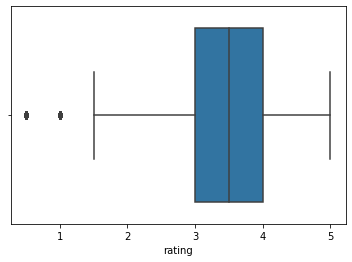

In [11]:
sns.boxplot(x=ratings.rating)

In [12]:
movies = pd.read_csv("movies.csv")
movies.columns = ["movie_id", "title", "genres"]
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
ratings.query("movie_id==1").rating.mean()

3.9209302325581397

In [14]:
ratings.query("movie_id==2").rating.mean()

3.4318181818181817

In [15]:
mean_by_movie = ratings.groupby("movie_id").mean().rating
mean_by_movie.head()

movie_id
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

<AxesSubplot:ylabel='Frequency'>

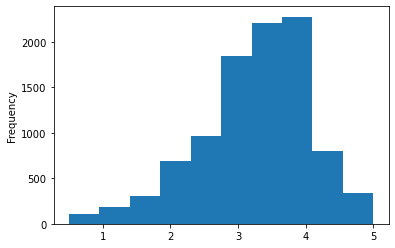

In [16]:
mean_by_movie.plot(kind='hist', bins=10)

<AxesSubplot:xlabel='rating'>

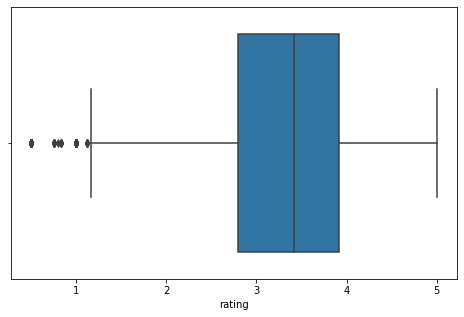

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x=mean_by_movie)

In [18]:
mean_by_movie.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: rating, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

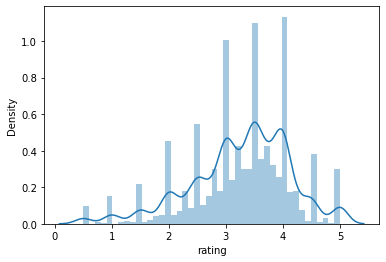

In [19]:
sns.distplot(mean_by_movie)

<AxesSubplot:xlabel='rating', ylabel='Count'>

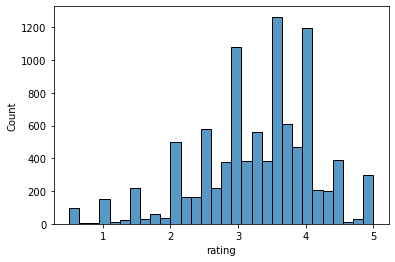

In [20]:
sns.histplot(mean_by_movie, bins=30)

Text(0.5, 1.0, 'Movie mean histogram')

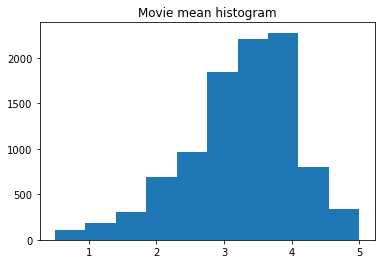

In [21]:
plt.hist(mean_by_movie)
plt.title("Movie mean histogram")